## Ice Temperature (icetemp) Analysis

Analyzing thermistor data from South Pole neutrino experiments during the time period 2002 - 2010

In [1]:
# Standard imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Imports from ice temperature estimation package
import icetemp
import icetemp.data_io as io
import icetemp.model as m

____
# Inference on all years, least-squares regression, polynomial fits

## Quadratic fit


Best fit values for real data of 2002:
b = -46.2 ± 0.201
m = -0.00849 ± 0.000257
q = 8.07e-06 ± 8.09e-08

Best fit values for real data of 2007:
b = -19.9 ± 12.9
m = -0.0336 ± 0.0114
q = 1.41e-05 ± 2.5e-06

Best fit values for real data of 2009:
b = -17.9 ± 12.9
m = -0.0353 ± 0.0114
q = 1.45e-05 ± 2.5e-06

Best fit values for real data of 2010:
b = -11.6 ± 12.9
m = -0.041 ± 0.0114
q = 1.58e-05 ± 2.5e-06


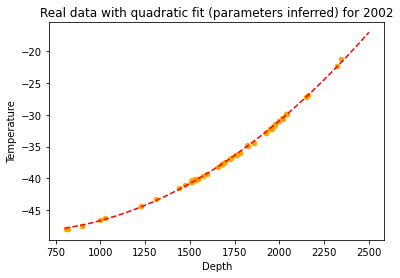

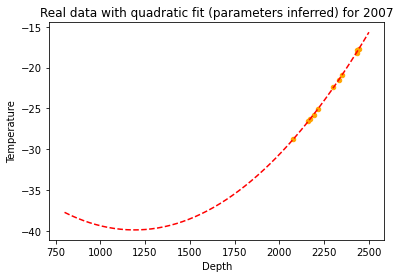

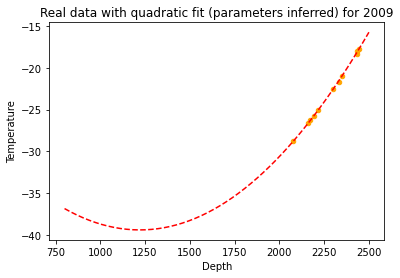

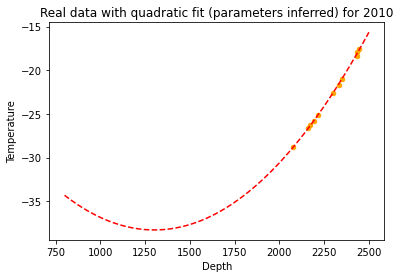

In [2]:
# load real data
data_2002 = io.load_ice_data("amanda_temp.txt", data_year=2002,temp_errors=0.1, depth_errors=2) 
data_2007 = io.load_ice_data("icecube_temp.2007.txt", data_year=2007,temp_errors=0.1, depth_errors=2)
data_2009 = io.load_ice_data("icecube_temp.2009.txt", data_year=2009,temp_errors=0.1, depth_errors=2)
data_2010 = io.load_ice_data("icecube_temp.2010.txt", data_year=2010,temp_errors=0.1, depth_errors=2)

data = [data_2002, data_2007, data_2009, data_2010]
x = np.linspace(800,2500)


for year in range(len(data)):
    params, cov_mat = m.fit_quad(data[year])

    # print formatting function adapted from HW 6 solutions
    uncertainties = np.sqrt(np.diag(cov_mat))
    print("\nBest fit values for real data of {}:".format(data[year]['data_year'][0]))
    for value, sigma, name in zip(params, uncertainties, 'bmq'):
        print('{} = {:.3} ± {:.3}'.format(name, value, sigma))

    x.sort()    
    data[year].plot(x='Depth', y='Temperature', kind='scatter', yerr=0.1,color='orange')
    plt.plot(x, params[2]*x**2 + params[1]*x + params[0], linestyle='dashed', color='red')
    plt.title("Real data with quadratic fit (parameters inferred) for {}".format(data[year]['data_year'][0]))

____
# Inference on all years, MCMC

## Quadratic fit

In [ ]:
#MCMC on real data
init_guess = {'b':-40, 'm':-0.0009, 'q':8.07e-06}

year_list = []
temp_list = []
pred_errs_list = []
for year in range(len(data)):
    params, errors = m.fit_quad_MCMC(data[year], init_guess) # returns params in order b, m, q
    print("Paremters from MCMC for the year {}".format(data[year]['data_year'][0]))
    print(params)
    
    year_list.append(data[year]['data_year'][0])
    temp_list.append(params[0])
    pred_errs_list.append(errors[0])
    
    data[year].plot(x='Depth', y='Temperature', kind='scatter', yerr=0.1,color='orange')
    plt.plot(x, params[2]*x**2 + params[1]*x + params[0], linestyle='dashed', color='blue')
    plt.title("Real data with quadratic fit (parameters from MCMC) for {}".format(data[year]['data_year'][0])

## MCMC, generalized 

In [ ]:
n = 2
timetable_poly_2 = m.get_timetable(n, data)

In [ ]:
n = 3
timetable_poly_3 = m.get_timetable(n, data)

In [ ]:
n = 4
timetable_poly_4 = m.get_timetable(n, data)

In [ ]:
n = 5
timetable_poly_5 = m.get_timetable(n, data)

In [ ]:
n = 6
timetable_poly_6 = m.get_timetable(n, data)

____
# After inferring temperature at ground level, use GPR

In [3]:
print(timetable_poly_2)

plt.errorbar(timetable_poly_2['year'], timetable_poly_2['temperature'], fmt='ro', yerr=timetable_poly_2['prediction_errors'])
plt.ylabel('Ground Level Temperature [ºC]')
plt.xlabel('Year')

NameError: name 'timetable_poly_2' is not defined

In [ ]:
print(timetable_poly_3)

plt.errorbar(timetable_poly_3['year'], timetable_poly_3['temperature'], fmt='ro', yerr=timetable_poly_3['prediction_errors'])
plt.ylabel('Ground Level Temperature [ºC]')
plt.xlabel('Year')